# EVN

In [199]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [200]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [201]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [202]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [203]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [204]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [205]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [206]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [207]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [208]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [209]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [210]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [211]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [212]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [213]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.01002263, -0.00540403, -0.01485989,  0.00150504,
          0.04015441, -0.01422639, -0.02483305, -0.03455536],
        [-0.02081274,  0.00694569,  0.03184452, -0.0454769 ,
         -0.03101435,  0.03697933, -0.03699275,  0.02463248],
        [-0.02099736,  0.01210922, -0.01387791,  0.00540315,
          0.01000174,  0.02263781,  0.03037303,  0.02559111],
        [ 0.01506049, -0.01420552, -0.00235223,  0.00379646,
         -0.0279552 , -0.04354946,  0.0064439 , -0.00288156]],

       [[-0.01002263, -0.00540403, -0.01485989,  0.00150504,
          0.04015441, -0.01422639, -0.02483305, -0.03455536],
        [-0.02081274,  0.00694569,  0.03184452, -0.0454769 ,
         -0.03101435,  0.03697933, -0.03699275,  0.02463248],
        [ 0.04708585, -0.00501693, -0.01733308,  0.03430415,
         -0.02398107, -0.00029354,  0.02342064, -0.01546003],
        [ 0.03097936, -0.0035213 ,  0.04244847,  0.00997678,
          0.02040379, -0.

In [214]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[ 0.03097936, -0.0035213 ,  0.04244847,  0.00997678,  0.02040379,
        -0.04608389, -0.00744647, -0.03762488],
       [ 0.02184675,  0.03159752,  0.02338016, -0.01345424, -0.02449748,
         0.04339029,  0.03307632, -0.00826959],
       [-0.01002263, -0.00540403, -0.01485989,  0.00150504,  0.04015441,
        -0.01422639, -0.02483305, -0.03455536],
       [-0.02081274,  0.00694569,  0.03184452, -0.0454769 , -0.03101435,
         0.03697933, -0.03699275,  0.02463248],
       [-0.02099736,  0.01210922, -0.01387791,  0.00540315,  0.01000174,
         0.02263781,  0.03037303,  0.02559111],
       [ 0.01506049, -0.01420552, -0.00235223,  0.00379646, -0.0279552 ,
        -0.04354946,  0.0064439 , -0.00288156],
       [ 0.04708585, -0.00501693, -0.01733308,  0.03430415, -0.02398107,
        -0.00029354,  0.02342064, -0.01546003]], dtype=float32)

In [215]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[-0.01002263, -0.00540403, -0.01485989,  0.00150504,
           0.04015441, -0.01422639, -0.02483305, -0.03455536],
         [-0.02081274,  0.00694569,  0.03184452, -0.0454769 ,
          -0.03101435,  0.03697933, -0.03699275,  0.02463248],
         [-0.02099736,  0.01210922, -0.01387791,  0.00540315,
           0.01000174,  0.02263781,  0.03037303,  0.02559111],
         [ 0.01506049, -0.01420552, -0.00235223,  0.00379646,
          -0.0279552 , -0.04354946,  0.0064439 , -0.00288156]],
 
        [[-0.01002263, -0.00540403, -0.01485989,  0.00150504,
           0.04015441, -0.01422639, -0.02483305, -0.03455536],
         [-0.02081274,  0.00694569,  0.03184452, -0.0454769 ,
          -0.03101435,  0.03697933, -0.03699275,  0.02463248],
         [ 0.04708585, -0.00501693, -0.01733308,  0.03430415,
          -0.02398107, -0.00029354,  0.02342064, -0.01546003],
         [ 0.03097936, -0.0035213 ,  0.04244847,  0.00997678,
           0.02040379, -0.04608389, -0.00744647, -0.03762488

In [216]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.33071318, 0.32961276, 0.33967412],
        [0.3296415 , 0.33374557, 0.33661288],
        [0.33644658, 0.33213395, 0.3314194 ],
        [0.33650753, 0.33297008, 0.33052233]],

       [[0.33071318, 0.32961276, 0.33967412],
        [0.3296415 , 0.33374557, 0.33661288],
        [0.33345595, 0.3432875 , 0.32325658],
        [0.33259678, 0.32900485, 0.3383983 ]]], dtype=float32)>

In [217]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[-0.30653107, -0.00466603, -0.45823833],
        [ 0.72340435,  0.33843464,  0.7271933 ],
        [-0.06855965, -0.08541858,  0.19762444],
        [-0.5827822 , -0.08949792, -0.41613424],
        [-0.45805696, -0.6850806 , -0.11204493],
        [ 0.11809641,  0.7173675 ,  0.1503914 ],
        [ 0.60019356,  0.13828969, -0.0842635 ],
        [ 0.56653494,  0.48578888,  0.609706  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [218]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.05524993, -0.05858285, -0.02851472],
        [ 0.04604999,  0.05842331,  0.06697789],
        [ 0.04381884,  0.0309178 ,  0.02876409],
        [-0.00704696, -0.01761487, -0.02499326]],

       [[-0.05524993, -0.05858285, -0.02851472],
        [ 0.04604999,  0.05842331,  0.06697789],
        [-0.02061775,  0.00843972, -0.05168216],
        [-0.06134158, -0.07219992, -0.04404884]]], dtype=float32)

In [219]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[0.94624865, 0.9431001 , 0.97188795],
         [1.0471268 , 1.0601637 , 1.0692718 ],
         [1.044793  , 1.0314007 , 1.0291818 ],
         [0.99297786, 0.98253936, 0.97531646]],
 
        [[0.94624865, 0.9431001 , 0.97188795],
         [1.0471268 , 1.0601637 , 1.0692718 ],
         [0.97959334, 1.0084754 , 0.94963074],
         [0.9405019 , 0.9303449 , 0.9569073 ]]], dtype=float32),
 array([[[2.8612366],
         [3.1765623],
         [3.1053758],
         [2.9508338]],
 
        [[2.8612366],
         [3.1765623],
         [2.9376996],
         [2.827754 ]]], dtype=float32))

In [220]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.33071318, 0.32961276, 0.3396741 ],
         [0.3296415 , 0.3337456 , 0.33661288],
         [0.33644655, 0.33213395, 0.3314194 ],
         [0.33650756, 0.33297008, 0.33052233]],
 
        [[0.33071318, 0.32961276, 0.3396741 ],
         [0.3296415 , 0.3337456 , 0.33661288],
         [0.33345592, 0.34328747, 0.32325658],
         [0.3325968 , 0.32900488, 0.33839834]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.33071318, 0.32961276, 0.33967412],
         [0.3296415 , 0.33374557, 0.33661288],
         [0.33644658, 0.33213395, 0.3314194 ],
         [0.33650753, 0.33297008, 0.33052233]],
 
        [[0.33071318, 0.32961276, 0.33967412],
         [0.3296415 , 0.33374557, 0.33661288],
         [0.33345595, 0.3432875 , 0.32325658],
         [0.33259678, 0.32900485, 0.3383983 ]]], dtype=float32)>)

In [221]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding = 'causal')
    hidden = conv_1(hidden)
    hidden = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = 128, return_sequences = True))(hidden) # (bs, 128)
    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

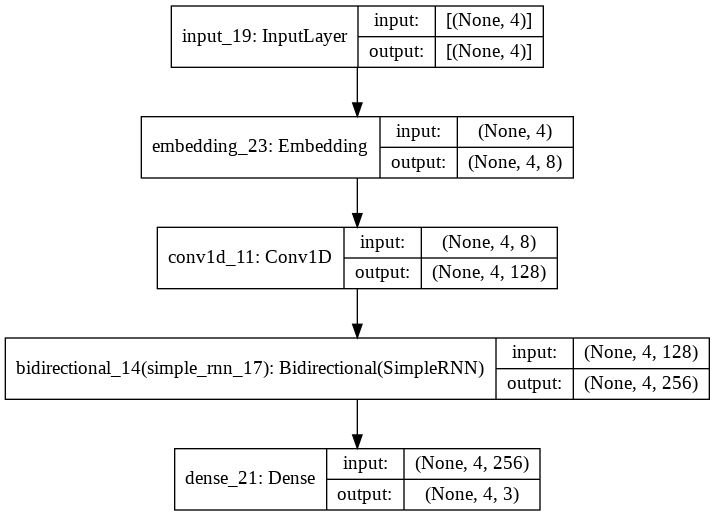

In [222]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [223]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [224]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0942 - accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0492 - accuracy: 0.8750
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0032 - accuracy: 0.8750
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9529 - accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8966 - accuracy: 0.8750
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8338 - accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7651 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6217 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5585 - accuracy: 0.7500
Epoch 11/100
1/1 [===========

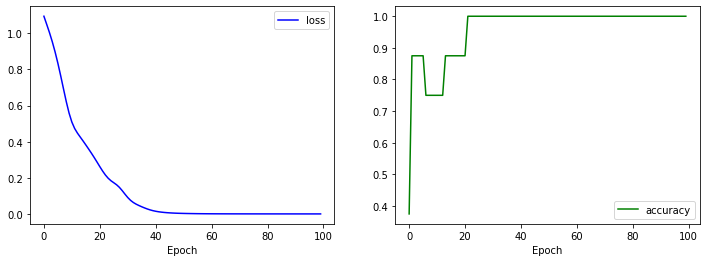

In [225]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [226]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 333ms/step - loss: 3.7183e-04 - accuracy: 1.0000


[0.00037182937376201153, 1.0]

## 예측

In [227]:
# 추론할 입력
string = '나는 기분이 우울해'

In [228]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [229]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [230]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [231]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[8.9660716e-05, 9.9990678e-01, 3.5236578e-06],
        [8.1932576e-06, 9.9992967e-01, 6.2088700e-05],
        [9.6327996e-01, 3.6353715e-05, 3.6683589e-02],
        [1.5494812e-04, 9.9496186e-01, 4.8832400e-03]]], dtype=float32)

In [232]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [233]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [234]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [235]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [236]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [237]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [238]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [239]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [240]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [241]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [242]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [243]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [244]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.03046058,  0.04289159, -0.02246985,  0.00329661,
         -0.00317667,  0.04758218,  0.04097388,  0.0177333 ],
        [-0.02720799,  0.0456727 , -0.03427794,  0.04696963,
          0.03645924, -0.03578637,  0.03811653, -0.03055942],
        [ 0.00821931,  0.0149211 , -0.02381439, -0.03189027,
          0.01015936, -0.01113373,  0.04630769, -0.04738482],
        [ 0.00527632,  0.04273439, -0.03978146, -0.0288049 ,
         -0.0412357 ,  0.02839733,  0.01523546, -0.03155907]],

       [[-0.03046058,  0.04289159, -0.02246985,  0.00329661,
         -0.00317667,  0.04758218,  0.04097388,  0.0177333 ],
        [-0.02720799,  0.0456727 , -0.03427794,  0.04696963,
          0.03645924, -0.03578637,  0.03811653, -0.03055942],
        [-0.00295913,  0.00448251,  0.00069701,  0.01487372,
         -0.03617085,  0.02940608,  0.0116709 ,  0.02042756],
        [ 0.02525977, -0.01736325,  0.04272579,  0.00544778,
         -0.0088991 ,  0.

In [245]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[ 0.00821931,  0.0456727 , -0.02246985,  0.04696963,  0.03645924,
         0.04758218,  0.04630769,  0.0177333 ],
       [ 0.02525977,  0.0456727 ,  0.04272579,  0.04696963,  0.03645924,
         0.04758218,  0.04097388,  0.02042756]], dtype=float32)>

In [246]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5063078 , 0.49369213],
       [0.51004314, 0.4899569 ]], dtype=float32)>

In [247]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding = 'causal')
    hidden = conv_1(hidden)
    conv_2 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding = 'valid')
    hidden = conv_2(hidden)
    hidden = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = 128, return_sequences = True))(hidden) # (bs, 128)
    hidden = tf.keras.layers.SimpleRNN(units = 128, return_sequences = True)(hidden)
    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

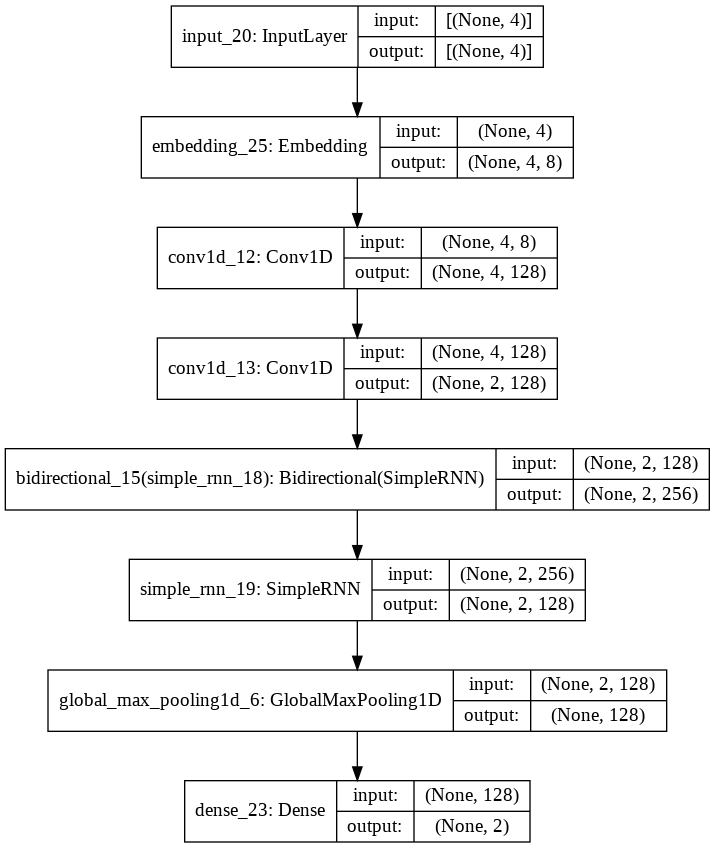

In [248]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [249]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [250]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6367 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5860 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 8ms/step - loss: 0.5276 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.4549 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.3712 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 0.2801 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 11ms/step - loss: 0.1923 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 0.1186 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 0.0657 - accuracy: 1.0000
Epoch 11/20
1/1 [==================

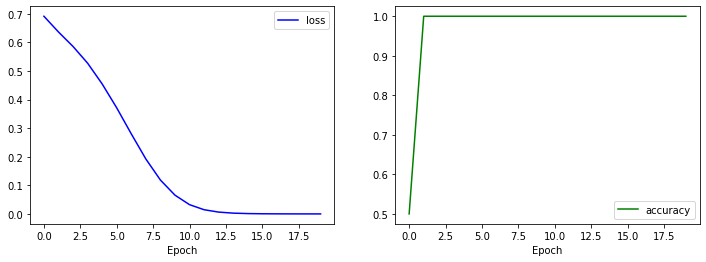

In [251]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [252]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 414ms/step - loss: 3.0875e-05 - accuracy: 1.0000


[3.087472578044981e-05, 1.0]

## 예측

In [253]:
# 추론할 입력
string = '나는 기분이 우울해'

In [254]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [255]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [256]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [257]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[9.9969792e-01, 3.0210867e-04]], dtype=float32)

In [258]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [259]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
